In [4]:
import numpy as np
import math
import random

patterns = []
classes = []

filename = 'iris.txt'
file = open(filename,'r')

for line in file.readlines():
    row = line.strip().split(',')
    patterns.append(row[0:4])
    classes.append(row[4])
print("Data loaded")
file.close

patterns = np.asarray(patterns,dtype=np.float32)

sample_no = np.random.randint(0,len(patterns))

print("Data sample: " + str(patterns[int(sample_no)]))
print("Target class: " + str(classes[int(sample_no)]))


Data loaded
Data sample: [5.  2.3 3.3 1. ]
Target class: 2


In [5]:
#A heuristic formula for calculating no. of map units

def mapunits(input_len,size='small'):
    
    heuristic_map_units = 5*input_len**0.54321
     
    if size == 'big':
        heuristic_map_units = 4 * (heuristic_map_units)
    else:
        heuristic_map_units = 0.25 * (heuristic_map_units)
        
    return heuristic_map_units
        
        
map_units = mapunits(len(patterns), size='big')
print("Heuristically computed appropriate no. of map units: "+str(int(map_units)))

#For reference purpose only - however this function can be used to automatically calculate the SOM dimensions
#from data length. I will still be specifying the SOM dimensions manually, anyway.

Heuristically computed appropriate no. of map units: 304


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

input_dimensions = 4
map_width = 20
map_height = 20
MAP = np.random.uniform(size=(map_height,map_width,input_dimensions))
prev_MAP = np.zeros((map_height,map_width,input_dimensions))

radius0 = max(map_width,map_height)/2

coordinate_map = np.zeros([map_height,map_width,2],dtype=np.int32)

for i in range(0,map_height):
    for j in range(0,map_width):
        coordinate_map[i][j] = [i,j]

learning_rate0 = 0.1
radius=radius0
learning_rate = learning_rate0
max_iterations = len(patterns) + 1
too_many_iterations = 10 * max_iterations

convergence = [1]
timestep=1
e=0.001 
flag=0
epoch=0
epochs = 1000

while epoch<epochs:
    
    shuffle = np.random.randint(len(patterns), size=len(patterns))
    for i in range(len(patterns)):
        
        # difference between prev_MAP and MAP
        J = np.linalg.norm(MAP - prev_MAP)
        # J = || euclidean distance between previous MAP and current MAP  ||

        if  J <= e: #if converged (convergence criteria)
            flag=1
            break
            
        else:
            
            pattern = patterns[shuffle[i]]
            pattern_ary = np.tile(pattern, (map_height, map_width, 1))
            Eucli_MAP = np.linalg.norm(pattern_ary - MAP, axis=2)
            
            # Get the best matching unit(BMU) which is the one with the smallest Euclidean distance
            BMU = np.unravel_index(np.argmin(Eucli_MAP, axis=None), Eucli_MAP.shape)
            
            prev_MAP = np.copy(MAP)
             
            for i in range(map_height):
                for j in range(map_width):
                    distance = np.linalg.norm([i - BMU[0], j - BMU[1]])
                    if distance <= radius:
                        MAP[i][j] = MAP[i][j] + learning_rate*(pattern-MAP[i][j])
            
            learning_rate = learning_rate0*(1-(epoch/epochs))
            radius = radius0*math.exp(-epoch/epochs)
            
            timestep+=1
    
    if J < min(convergence):
        print('Lower error found: %s' %str(J) + ' at epoch: %s' % str(epoch))
        print('\tLearning rate: ' + str(learning_rate))
        print('\tNeighbourhood radius: ' + str(radius))
        MAP_final = MAP
    convergence.append(J)
    
    if flag==1:
        break
    epoch+=1

Lower error found: 0.9122726966040825 at epoch: 7
	Learning rate: 0.0993
	Neighbourhood radius: 9.930244429332351
Lower error found: 0.6594368424265248 at epoch: 19
	Learning rate: 0.0981
	Neighbourhood radius: 9.811793622428059
Lower error found: 0.5939722166828934 at epoch: 39
	Learning rate: 0.0961
	Neighbourhood radius: 9.617507091463667
Lower error found: 0.37885432153880955 at epoch: 57
	Learning rate: 0.0943
	Neighbourhood radius: 9.445940693665234
Lower error found: 0.3308128955002573 at epoch: 218
	Learning rate: 0.0782
	Neighbourhood radius: 8.041254416665597
Lower error found: 0.2532298278051834 at epoch: 270
	Learning rate: 0.073
	Neighbourhood radius: 7.633794943368532
Lower error found: 0.24928329802286997 at epoch: 280
	Learning rate: 0.072
	Neighbourhood radius: 7.557837414557254
Lower error found: 0.16453448085967218 at epoch: 357
	Learning rate: 0.06430000000000001
	Neighbourhood radius: 6.9977249773461105
Lower error found: 0.16352508518107348 at epoch: 421
	Learning

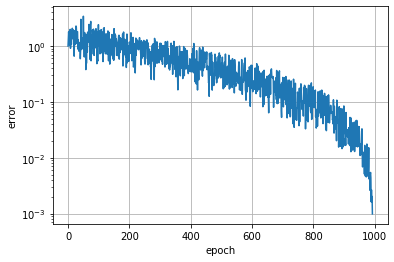

Number of timesteps: 148677
Final error: 0.0009907128305408318


In [7]:
# Show a plot of the error at each epoch to show convergence, but this is guaranteed in SOM
# due to the learning rate and neighbourhood decay
plt.plot(convergence)
plt.ylabel('error')
plt.xlabel('epoch')
plt.grid(True)
plt.yscale('log')
plt.show()
print('Number of timesteps: ' + str(timestep))
print('Final error: ' + str(J))

Red = 1
Green = 2
Blue = 3


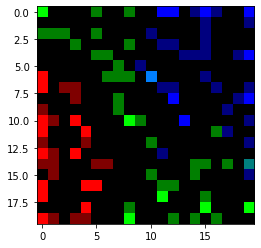

In [8]:
from PIL import Image

BMU = np.zeros([2],dtype=np.int32)
result_map = np.zeros([map_height,map_width,3],dtype=np.float32)

i=0
for pattern in patterns:
    
    pattern_ary = np.tile(pattern, (map_height, map_width, 1))
    Eucli_MAP = np.linalg.norm(pattern_ary - MAP_final, axis=2)

    # Get the best matching unit(BMU) which is the one with the smallest Euclidean distance
    BMU = np.unravel_index(np.argmin(Eucli_MAP, axis=None), Eucli_MAP.shape)
    
    x = BMU[0]
    y = BMU[1]
    
    if classes[i] == '1':
        if result_map[x][y][0] <= 0.5:
            result_map[x][y] += np.asarray([0.5,0,0])
    elif classes[i] == '2':
        if result_map[x][y][1] <= 0.5:
            result_map[x][y] += np.asarray([0,0.5,0])
    elif classes[i] == '3':
        if result_map[x][y][2] <= 0.5:
            result_map[x][y] += np.asarray([0,0,0.5])
    i+=1
result_map = np.flip(result_map,0)
    
#print result_map

print("Red = 1")
print("Green = 2")
print("Blue = 3")

plt.imshow(result_map, interpolation='nearest')